In [1]:
import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset from torchvision.datasets
mnist = MNIST(root='data/', train=True, download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
# Convert features to float32 and targets to long
features_train = mnist.data.float()
targets_train = mnist.targets.long()

In [4]:
# Normalize features from [0, 255] to [0, 1]
features_train /= 255

# Flatten features to 1-D vector of 784 features
features_train = features_train.view(-1, 784)



In [5]:
# Define number of iterations, batch size, and epochs
n_iters = 5000
batch_size = 100
num_epochs = n_iters // (len(features_train) // batch_size)


In [6]:
# Create PyTorch tensor and variable for features and targets for training set
train_set = TensorDataset(features_train, targets_train)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
features_train = torch.tensor(features_train, requires_grad=True)
targets_train = torch.tensor(targets_train)


<ipython-input-6-7ffd78aa0c34>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_train = torch.tensor(features_train, requires_grad=True)
<ipython-input-6-7ffd78aa0c34>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets_train = torch.tensor(targets_train)


In [7]:
# Load test set and convert features to float32, normalize, and flatten
mnist_test = MNIST(root='data/', train=False, download=True)
features_test = mnist_test.data.float()
targets_test = mnist_test.targets.long()
features_test /= 255
features_test = features_test.view(-1, 784)

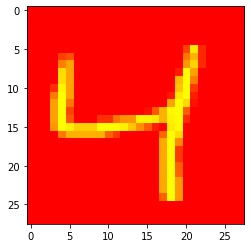

In [8]:
# Create PyTorch tensor for features and targets for test set
test_set = TensorDataset(features_test, targets_test)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Visualize one of the images in the training set
plt.imshow(mnist.data[2], cmap='autumn')
plt.show()



In [9]:
import torch
import torch.nn as nn

class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 300
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [10]:
# Set number of epochs
num_epochs = 5
count=0

# Define empty lists to store loss, iteration and accuracy values
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Convert input and labels to Variables
        train = (images.view(-1, 28*28))
        labels = (labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = criterion(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        # Count iterations
        count += 1

        # Calculate accuracy every 50 iterations
        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = (images.view(-1, 28*28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += labels.size(0)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # Store loss and iteration values
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        # Print loss and accuracy every 500 iterations
        if count % 500 == 0:
            print('Iteration: {} Loss: {:.4f} Accuracy: {:.2f} %'.
                  format(count, loss.data, accuracy))


Iteration: 500 Loss: 0.5029 Accuracy: 87.37 %
Iteration: 1000 Loss: 0.3546 Accuracy: 89.54 %
Iteration: 1500 Loss: 0.4575 Accuracy: 90.34 %
Iteration: 2000 Loss: 0.2795 Accuracy: 91.07 %
Iteration: 2500 Loss: 0.2947 Accuracy: 91.71 %
Iteration: 3000 Loss: 0.2653 Accuracy: 92.05 %


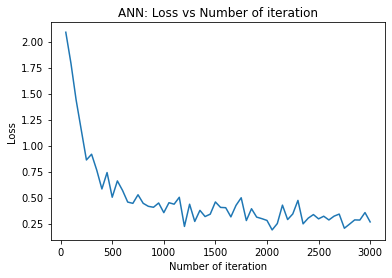

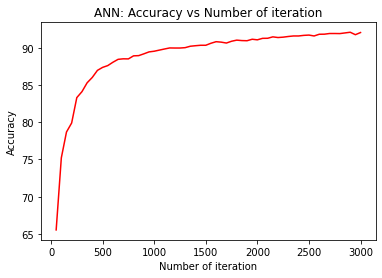

In [11]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()